### Atividade da Aula

- **Aluno:** Augusto Mathias Adams

#### Parte 1

**Rode todo o código. Responda às questões nele contidas e complete-o, se necessário**

Feito.

#### Parte 2
1. **Fazendo uma análise cuidadosa de como diferentes valores de limiar afetam as taxas de $VP$ e $FP$ resultantes para os dados de validação deste problema, escolha um valor de limiar adequado. Justifique e detalhe sua escolha final.**

A tabela a seguir, extraída da execução do código deste *notebook*, será utilizada para fins de análise e justificativa da resposta à questão.

| **Valor Limiar** | **Taxa de VP** | **Taxa de FP** |
|-------------------|----------------|----------------|
| 0.00             | 1.000000       | 1.000000       |
| 0.02             | 0.893333       | 0.011567       |
| 0.04             | 0.880000       | 0.009598       |
| 0.06             | 0.880000       | 0.008543       |
| 0.08             | 0.880000       | 0.008016       |
| 0.10             | 0.880000       | 0.007577       |
| 0.12             | 0.880000       | 0.007172       |
| 0.14             | 0.880000       | 0.007014       |
| 0.16             | 0.880000       | 0.006768       |
| 0.18             | 0.880000       | 0.006434       |
| 0.20             | 0.866667       | 0.006258       |
| 0.22             | 0.866667       | 0.006047       |
| 0.24             | 0.866667       | 0.005889       |
| 0.26             | 0.866667       | 0.005801       |
| 0.28             | 0.866667       | 0.005608       |
| 0.30             | 0.853333       | 0.005485       |
| 0.32             | 0.853333       | 0.005379       |
| 0.34             | 0.853333       | 0.005326       |
| 0.36             | 0.853333       | 0.005203       |
| 0.38             | 0.840000       | 0.005080       |
| 0.40             | 0.840000       | 0.005010       |
| 0.42             | 0.840000       | 0.004834       |
| 0.44             | 0.840000       | 0.004746       |
| 0.46             | 0.840000       | 0.004658       |
| 0.48             | 0.840000       | 0.004588       |
| 0.50             | 0.840000       | 0.004500       |
| 0.52             | 0.840000       | 0.004412       |
| 0.54             | 0.840000       | 0.004377       |
| 0.56             | 0.840000       | 0.004254       |
| 0.58             | 0.840000       | 0.004149       |
| 0.60             | 0.840000       | 0.004008       |
| 0.62             | 0.840000       | 0.003867       |
| 0.64             | 0.840000       | 0.003832       |
| 0.66             | 0.840000       | 0.003709       |
| 0.68             | 0.840000       | 0.003569       |
| 0.70             | 0.840000       | 0.003481       |
| 0.72             | 0.840000       | 0.003340       |
| 0.74             | 0.840000       | 0.003111       |
| 0.76             | 0.840000       | 0.002918       |
| 0.78             | 0.840000       | 0.002777       |
| 0.80             | 0.840000       | 0.002619       |
| 0.82             | 0.826667       | 0.002426       |
| 0.84             | 0.826667       | 0.002197       |
| 0.86             | 0.826667       | 0.001969       |
| 0.88             | 0.813333       | 0.001705       |
| 0.90             | 0.813333       | 0.001565       |
| 0.92             | 0.800000       | 0.001318       |
| 0.94             | 0.773333       | 0.001072       |
| 0.96             | 0.746667       | 0.000756       |
| 0.98             | 0.706667       | 0.000580       |
| 1.00             | 0.026667       | 0.000053       |

No contexto do problema, devemos buscar o menor valor de $FP$ enquanto mantém uma alta taxa de $VP$. Para valores de limiar baixos ($0.00$), o modelo tem uma taxa de $VP$ máxima ($1.0$), mas uma taxa de $FP$ ($1.0$). Entre os limiares $0.02$–$0.18$, a taxa de VP se mantém elevada ($0.880000$–$0.893333$), enquanto a taxa de $FP$ decresce de $0.011567$ para $0.006434$. No intervalo de $0.20$ a $0.66$, a taxa de $VP$ começa a declinar de $0.880000$ para $0.840000$, acompanhada por uma redução na taxa de $FP$, que atinge valores inferiores a $0.004$. A partir de $0.68$, a taxa de $VP$ mantém-se estável em $0.840000$ até o limiar de $0.80$, enquanto a taxa de $FP$ continua caindo. Após o limiar $0.82$, a taxa de $VP$ sofre um declínio constante, chegando a $0.026667$ em para o limiar de $1.00$, com a taxa de $FP$ próxima de zero ($0.000053$).

Pela análise da curva $ROC$ existente ao final do código, nota-se que é praticamente inviável aumentar a taxa de $VP$ e diminuir a taxa de $VP$ simultaneamente, portanto, o critério a ser utilizado é uma ponderação dos objetivos do problema: Deseja-se diminuir a taxa de $FP$ sem contudo diminuir drasticamente a taxa de $VP$. Portanto, valores de limiar entre $0.04$ e $0.80$ parecem, a princípio, razoáveis dentro deste contexto. 

Considerando que há $56.961$ transações em nosso conjunto de validação, das quais $75$ são fraudulentas, podemos supor o seguinte:

- Transações fraudulentas são mais danosas ao sistema financeiro do que uma transação legítima negada por suspeita de fraude. Uma transação negada simplesmente pode ser refeita dentro de alguns minutos, dependendo do mecanismo do banco, uma transação fraudulenta que burlou o sistema de detecção de fraudes gera custos para o banco e até processos - daí a importância de detectá-las em tempo.

- manter uma taxa de $VP$ alta significa que menos transações fraulentas são passpiveis de causar impacto no sistema financeiro - daí vem a importância deste parâmetro ser elevado.

- Contudo, se o valor da taxa de $FP$ for suficientemente elevada, haverá reclamações por causa de transações legítimas sendo recusadas.

- Isto posto, o valor dito como ótimo deve ser uma ponderação entre as duas situações:

    - Primeiro, a quantidade de transações fraudulentas é extremamente baixa, e não há muitos problemas em sua não detecção devido ao baixo volume.
    - Segundo, é mais interessante reduzir a taxa de $FP$ pois o volume de transações legítimas é alto, impactando seriamente  o sistema financeiro.

Um valor de limiar entre $0.4$ e $0.8$ seria algo a considerar. Para o limiar de $0.8$, tem-se para a base de validação:

- $VP = 0.84 \times 75 = 63$
- $FP = 0.0002619 \times 56886 \approx 149 $

Valores estes bem mais administráveis do que o resultado da matrix de confusão ($VP = 63$, $FP = 256$). Portanto, o valor de limiar $0.8$ é bastante razoável e é o nosso valor escolhido, pois embora não altere o $VP$, reduz drasticamente o $FP$ se comparado aos resultados da matriz de confusão.





# Classificação desbalanceada (Escolha do valor de limiar para classicação e cálculo das métricas ROC e AUC)

Esse notebook é uma tradução e adaptação do exemplo apresentado [no site do Keras](https://keras.io/examples/structured_data/imbalanced_classification/), criado por [fchollet](https://twitter.com/fchollet), e que utiliza essa base de dados do Kaggle [aqui](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).


## Introdução

Este exemplo mostra como treinar um modelo classificador quando os dados são altamente desbalanceados. O objetivo é treinar uma rede neural capaz de identificar operações financeiras fraudulentas.

## Vetorizando os dados CSV

In [14]:
import csv
import numpy as np

# Os dados reais contendo operações financeiras pode ser obtido em https://www.kaggle.com/mlg-ulb/creditcardfraud/
fname = "creditcard.csv"

todas_caracteristicas = []
todos_rotulos         = []
with open(fname) as f:
    for i, line in enumerate(f):
        if i == 0: # primeira linha da tabela: cabeçalho
            print("CABECALHO:", line.strip())
            continue  # pula cabeçalho da tabela
        fields = line.strip().split(",")
        todas_caracteristicas.append([float(v.replace('"', "")) for v in fields[:-1]])
        todos_rotulos.append([int(fields[-1].replace('"', ""))])
        if i == 1:
            print("CARACTERISTICAS:", todas_caracteristicas[-1])

caracteristicas = np.array(todas_caracteristicas, dtype="float32")
valores_alvo    = np.array(todos_rotulos, dtype="uint8")
print("caracteristicas.shape:", caracteristicas.shape)
print("valores_alvo.shape:", valores_alvo.shape)

CABECALHO: "Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"
CARACTERISTICAS: [0.0, -1.3598071336738, -0.0727811733098497, 2.53634673796914, 1.37815522427443, -0.338320769942518, 0.462387777762292, 0.239598554061257, 0.0986979012610507, 0.363786969611213, 0.0907941719789316, -0.551599533260813, -0.617800855762348, -0.991389847235408, -0.311169353699879, 1.46817697209427, -0.470400525259478, 0.207971241929242, 0.0257905801985591, 0.403992960255733, 0.251412098239705, -0.018306777944153, 0.277837575558899, -0.110473910188767, 0.0669280749146731, 0.128539358273528, -0.189114843888824, 0.133558376740387, -0.0210530534538215, 149.62]
caracteristicas.shape: (284807, 30)
valores_alvo.shape: (284807, 1)


## Preparando os dados

In [15]:
num_amostras_validacao = int(len(caracteristicas) * 0.2) # deixaremos 20% dos dados para validação
X_trein = caracteristicas[:-num_amostras_validacao]
y_trein = valores_alvo[:-num_amostras_validacao]
X_val   = caracteristicas[-num_amostras_validacao:]
y_val   = valores_alvo[-num_amostras_validacao:]

print("Número de amostras de treinamento:", len(X_trein))
print("Número de amostras de validação:", len(X_val))

Número de amostras de treinamento: 227846
Número de amostras de validação: 56961


## Análise do desbalanceamento nos rótulos e atribuição de pesos diferentes

In [16]:
qtdade_amostras_cada_classe = np.bincount(y_trein[:, 0]) # função do numpy que conta a quantidade de amostras para cada classe
print(qtdade_amostras_cada_classe)
print(
    "Número de amostras positivas no conjunto de dados: {} ({:.2f}% do total)".format(
        qtdade_amostras_cada_classe[1], 100 * float(qtdade_amostras_cada_classe[1]) / len(y_trein)
    )
)

peso_classe_0 = 1.0 / qtdade_amostras_cada_classe[0]
peso_classe_1 = 1.0 / qtdade_amostras_cada_classe[1]

print("Peso para classe 0:", peso_classe_0 )
print("Peso para classe 1:", peso_classe_1 )

pesos_classes = {0: peso_classe_0, 1: peso_classe_1} # cria um dicionário com o peso de cada classe

[227429    417]
Número de amostras positivas no conjunto de dados: 417 (0.18% do total)
Peso para classe 0: 4.396976638863118e-06
Peso para classe 1: 0.002398081534772182


## Normalizando os dados usando média e desvio padrão

In [17]:
media    = np.mean(X_trein, axis=0)
X_trein -= media
X_val   -= media
desvio   = np.std(X_trein, axis=0)
X_trein /= desvio
X_val   /= desvio

## Criando uma rede neural para classificação binária

In [18]:
import keras

modelo = keras.Sequential(
    [
        keras.Input(shape=X_trein.shape[1:]),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,777 (546.00 KB)

 Trainable params: 139,777 (546.00 KB)

 Non-trainable params: 0 (0.00 B)

## Treinando o modelo levando em conta o desbalaceamento entre as classes

In [19]:
modelo.compile(optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy")

modelo.fit(
    X_trein,
    y_trein,
    batch_size=2048, # define a quantidade de amostras de cada "mini-lote" (se comentarmos essa linha, será usado o padrão de 32 amostras por mini-lote)
    epochs=30,
    class_weight=pesos_classes,
)

Epoch 1/30


112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 3.1492e-06
Epoch 2/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0358e-06
Epoch 3/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.0799e-06
Epoch 4/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.1408e-06
Epoch 5/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.5158e-07
Epoch 6/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.3900e-07
Epoch 7/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.6904e-07
Epoch 8/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.0669e-07
Epoch 9/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.6558e-07
Epoch 10/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.1708e-07
Epoch 11/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.4877e-07
Epoch 12/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.1752e-07
Epoch 13/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.5627e-07
Epoch 14/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.7165e-0

In [20]:
probabilidades = modelo.predict(X_val) # cálculo da saída da rede neural para as transações de validação

print(probabilidades.shape) # verificando o shape das probabilidades

print(probabilidades[:10])

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 922us/step
(56961, 1)
[[9.93508601e-18]
 [1.07524438e-15]
 [1.46557063e-14]
 [1.17047755e-02]
 [9.71975550e-03]
 [7.42751567e-08]
 [1.41827542e-07]
 [3.00793406e-15]
 [3.72056820e-04]
 [2.40585194e-13]]


In [21]:
valor_limiar = 0.5

y_val_est = (probabilidades >= valor_limiar).astype(int)

print(y_val_est.shape)
print(y_val_est[:10])

(56961, 1)
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


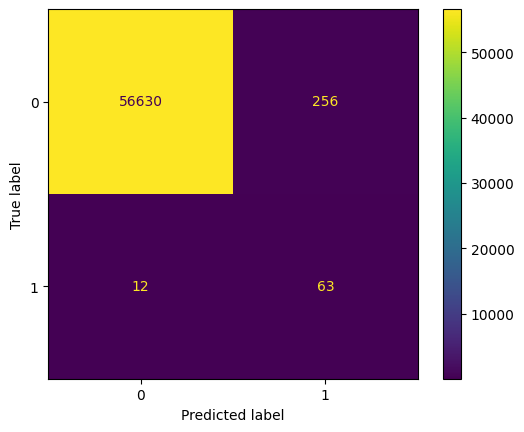

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_val_est) # cm = confusion matrix = matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()


A partir da matriz de confusão, gerada para as transações de validação, podemos perceber que (os valores abaixo podem variar ligeiramente devido à inicialização aleatória dos pesos da rede neural):

- 56961 transações de validação foram avalidadas pela rede neural
- 66 transações foram corretamente identificadas como fraudulentas
- 8 transações fraudulentas não foram detectadas
- Infelizmente, 441 transações não fraudulentas foram incorretamente classificadas como fraudulentas.


Abaixo iremos construir uma função que permite calcular a matriz de confusão e suas métricas para diferentes valores de limiar

In [23]:
def calcula_metricas(probabilidades, valor_limiar=0.5):

  y_val_est = (probabilidades >= valor_limiar).astype(int)

  cm = confusion_matrix(y_val, y_val_est) # cm = confusion matrix = matriz de confusão

  # calculando métricas relativas à matriz de confusão

  # faremos os cálculos abaixo levando em conta apenas a classe y=1 como sendo a classe "positiva" (classe de referência)
  # Note que a posição dos elementos na matriz de confusão obtida pela função "confusion_matrix" do sk learn é diferente daquela apresentada nos slides da aula.
  vp = cm[1,1] # verdadeiros positivos
  vn = cm[0,0] # verdadeiros negativos
  fp = cm[0,1] # falsos positivos
  fn = cm[1,0] # falsos negativos

  precisao  = vp / (vp + fp)
  revocacao = vp / (vp + fn)
  f1_score  = 2*precisao*revocacao / (precisao + revocacao)
  taxa_VP   = revocacao
  taxa_FP   = fp / (fp + vn)

  return precisao, revocacao, f1_score, taxa_VP, taxa_FP

In [24]:
valor_limiar = 0.5

precisao, revocacao, f1_score, taxa_VP, taxa_FP = calcula_metricas(probabilidades, valor_limiar)

print("precisão: ", precisao)

print("recall: ", revocacao)

print("F1 score: ", f1_score)

print("taxa de VP: ", taxa_VP)

print("taxa de FP: ", taxa_FP)

precisão:  0.1974921630094044
recall:  0.84
F1 score:  0.3197969543147208
taxa de VP:  0.84
taxa de FP:  0.004500228527229898


Note que é possível rodar a célula acima para diversos valores de limiar.

A célula abaixo faz isso sistematicamente.

In [25]:
passo = 0.02 # define o passo de incremento do valor de limiar
valores_limiar = np.arange(0, 1+passo, passo) # define valores de limiar de 0 a 1 crescendo no passo pré-estabelecido
taxas_VP = []
taxas_FP = []

linhas = []

for valor_limiar in valores_limiar:
  precisao, revocacao, f1_score, taxa_VP, taxa_FP = calcula_metricas(probabilidades, valor_limiar)
  linha = {'Valor limiar': valor_limiar, 'Taxa de VP': taxa_VP, 'taxa de FP': taxa_FP}
  linhas.append(linha)


# Abaixo nós transformamos a lista acima num pandas dataframe

import pandas as pd

# Cria um DataFrame a partir da lista que contém as linhas da tabela
df = pd.DataFrame(linhas)

# Mostra o DataFrame resultante
# print(df)

# Mostra o DataFrame resultante sem omitir linhas
pd.set_option('display.max_rows', None)
print(df)

    Valor limiar  Taxa de VP  taxa de FP
0           0.00    1.000000    1.000000
1           0.02    0.893333    0.011567
2           0.04    0.880000    0.009598
3           0.06    0.880000    0.008543
4           0.08    0.880000    0.008016
5           0.10    0.880000    0.007577
6           0.12    0.880000    0.007172
7           0.14    0.880000    0.007014
8           0.16    0.880000    0.006768
9           0.18    0.880000    0.006434
10          0.20    0.866667    0.006258
11          0.22    0.866667    0.006047
12          0.24    0.866667    0.005889
13          0.26    0.866667    0.005801
14          0.28    0.866667    0.005608
15          0.30    0.853333    0.005485
16          0.32    0.853333    0.005379
17          0.34    0.853333    0.005326
18          0.36    0.853333    0.005203
19          0.38    0.840000    0.005080
20          0.40    0.840000    0.005010
21          0.42    0.840000    0.004834
22          0.44    0.840000    0.004746
23          0.46

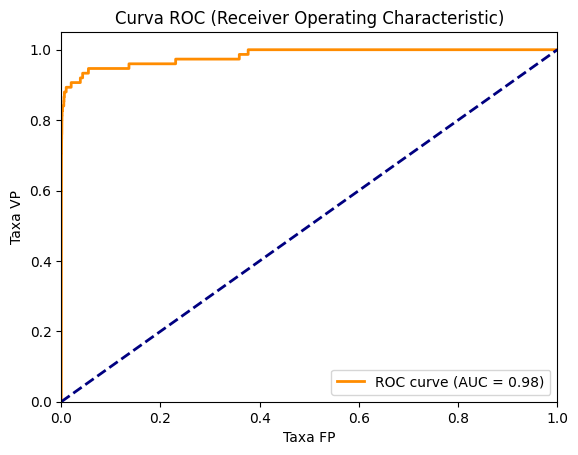

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_val, probabilidades) # já temos esses valores, portanto não precisamos recalcularmos usando o SK-learn

roc_auc = auc(fpr, tpr)
# roc_auc = auc(taxa_FP, taxa_VP)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa FP')
plt.ylabel('Taxa VP')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc='lower right')
plt.show()